

---


### **HRHN + VAR + Correcteur PID**


---



### importing the needed libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K

### loading the data

In [ ]:
# loading the data
df_final = pd.read_csv("btc_final_GI.csv",index_col=0)
df_final.head()

,price_low,price_high,price_open,BTC / Realized Market Cap (USD),BTC / Val in Addrs w/ Bal ≥ 100 (native units),BTC / Val in Addrs w/ Bal ≥ $1M USD,BTC / Val in Addrs w/ Bal ≥ $10M USD,BTC_price
11,340.0,340.0,340.0,4.380329e+09,9.221014e+06,4.145445e+06,1.924683e+06,340.0
12,340.0,340.0,340.0,4.370060e+09,9.223876e+06,4.051809e+06,1.854669e+06,340.0
13,340.0,340.0,340.0,4.362259e+09,9.235230e+06,4.025844e+06,1.820324e+06,340.0
14,340.0,340.0,340.0,4.354468e+09,9.238207e+06,4.069146e+06,1.825637e+06,340.0
15,340.0,340.0,340.0,4.355354e+09,9.241839e+06,4.107305e+06,1.860647e+06,340.0


### data types :

In [ ]:
df_final.dtypes

price_low                                         float64
price_high                                        float64
price_open                                        float64
BTC / Realized Market Cap (USD)                   float64
BTC / Val in Addrs w/ Bal ≥ 100 (native units)    float64
BTC / Val in Addrs w/ Bal ≥ $1M USD               float64
BTC / Val in Addrs w/ Bal ≥ $10M USD              float64
BTC_price                                         float64
dtype: object

modifiying types into float32 for saving memory:

In [ ]:
# Downcast dtypes from 64 to 32 bit to save memory
# by creating a downcast function

def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

In [ ]:
# downcasting dtypes in df_final to save some memory
downcast_dtypes(df_final)

,price_low,price_high,price_open,BTC / Realized Market Cap (USD),BTC / Val in Addrs w/ Bal ≥ 100 (native units),BTC / Val in Addrs w/ Bal ≥ $1M USD,BTC / Val in Addrs w/ Bal ≥ $10M USD,BTC_price
11,340.000000,340.000000,340.000000,4.380328e+09,9221014.0,4145445.00,1.924682e+06,340.000000
12,340.000000,340.000000,340.000000,4.370060e+09,9223876.0,4051808.50,1.854668e+06,340.000000
13,340.000000,340.000000,340.000000,4.362258e+09,9235230.0,4025844.50,1.820324e+06,340.000000
14,340.000000,340.000000,340.000000,4.354468e+09,9238207.0,4069145.75,1.825637e+06,340.000000
15,340.000000,340.000000,340.000000,4.355355e+09,9241839.0,4107304.75,1.860646e+06,340.000000
...,...,...,...,...,...,...,...,...
2651,44091.089844,44820.578125,44336.191406,4.637621e+11,11962955.0,15404481.00,1.085518e+07,44539.421875
2652,44437.218750,46950.000000,44538.210938,4.645012e+11,11964353.0,15443932.00,1.090280e+07,46850.011719
2653,46662.281250,48240.000000,46850.011719,4.657595e+11,11960485.0,15447591.00,1.090915e+07,47144.921875
2654,46589.000000,48124.941406,47146.921875,4.667479e+11,11951956.0,15441138.00,1.090427e+07,47454.191406


In [ ]:
# checking the downcasting
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 11 to 2655
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   price_low                                       2645 non-null   float32
 1   price_high                                      2645 non-null   float32
 2   price_open                                      2645 non-null   float32
 3   BTC / Realized Market Cap (USD)                 2645 non-null   float32
 4   BTC / Val in Addrs w/ Bal ≥ 100 (native units)  2645 non-null   float32
 5   BTC / Val in Addrs w/ Bal ≥ $1M USD             2645 non-null   float32
 6   BTC / Val in Addrs w/ Bal ≥ $10M USD            2645 non-null   float32
 7   BTC_price                                       2645 non-null   float32
dtypes: float32(8)
memory usage: 103.3 KB


### ploting Bitcoin price (the target)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=np.linspace(0,len(df_final),len(df_final)+1),y=df_final['BTC_price'], line=dict(color='blue', width=1),name="Index"))
fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()


### creating train and test sets

In [ ]:
# splitting data into train and test set
pourcentage = 0.90
splitting_time = int(len(df_final.values) * pourcentage)
splitting_date = df_final.index[splitting_time]

train_serie_X = np.array(df_final.values[:splitting_time],dtype=np.float32)
test_serie_X = np.array(df_final.values[splitting_time:],dtype=np.float32)

print("train set size : %d" %len(train_serie_X))
print("test set size : %d" %len(test_serie_X))

train set size : 2380
test set size : 265




### Normalizing the data 

Scaling the data using MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Building series
norm_train_serie_X = []
norm_test_serie_X = []

for i in range(0,len(df_final.columns)):
  norm_train_serie_X.append(train_serie_X[:,i])
  norm_test_serie_X.append(test_serie_X[:,i])

norm_train_serie_X = tf.convert_to_tensor(norm_train_serie_X)
norm_train_serie_X = tf.transpose(norm_train_serie_X)
norm_test_serie_X = tf.convert_to_tensor(norm_test_serie_X)
norm_test_serie_X = tf.transpose(norm_test_serie_X)

# Instantiating MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(norm_train_serie_X)

# Normalizing the series
norm_train_serie_X = min_max_scaler.transform(norm_train_serie_X)
norm_test_serie_X = min_max_scaler.transform(norm_test_serie_X)

In [ ]:
print("norm_train_serie_X size : ",norm_train_serie_X.shape)
print("norm_test_serie_X size : ",norm_test_serie_X.shape)

norm_train_serie_X size :  (2380, 8)
norm_test_serie_X size :  (265, 8)


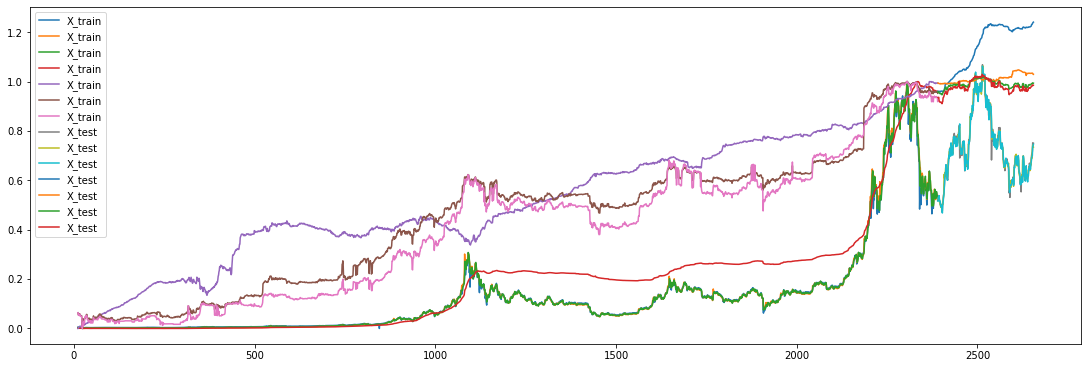

In [ ]:
# plotting few series
fig, ax = plt.subplots(constrained_layout=True, figsize=(15,5))

ax.plot(df_final.index[:splitting_time].values,norm_train_serie_X[:,0:7], label="X_train")
ax.plot(df_final.index[splitting_time:].values,norm_test_serie_X[:,0:7], label="X_test")

ax.legend()
plt.show()

### creating the datasets

In [ ]:
# defining a function that creates a dataset from the time series data
# X = {((X1_1,X1_2,...,X1_T),((X2_1,X2_2,...,X2_T),(X3_1,X3_2,...,X3_T)),
#       (Y1,Y2,...,YT)}
# Y = YT+1, YT+2, YT+3, ...

def prepare_dataset_XY(seriesX, serieY, sequence_length, output_length, batch_size,shift):
  datasetX = tf.data.Dataset.from_tensor_slices(seriesX)
  datasetX = datasetX.window(sequence_length+output_length, shift=shift, drop_remainder=True)
  datasetX = datasetX.flat_map(lambda x: x.batch(sequence_length + output_length))
  datasetX = datasetX.map(lambda x: (x[0:sequence_length][:,:]))
  datasetX = datasetX.batch(batch_size,drop_remainder=True).prefetch(1)

  datasetY = tf.data.Dataset.from_tensor_slices(serieY)
  datasetY = datasetY.window(sequence_length+output_length, shift=shift, drop_remainder=True)
  datasetY = datasetY.flat_map(lambda x: x.batch(sequence_length + output_length))
  datasetY = datasetY.map(lambda x: (x[0:sequence_length][:,:]))
  datasetY = datasetY.batch(batch_size,drop_remainder=True).prefetch(1)

  datasetYPred = tf.data.Dataset.from_tensor_slices(serieY)
  datasetYPred = datasetYPred.window(sequence_length+output_length+1, shift=shift, drop_remainder=True)
  datasetYPred = datasetYPred.flat_map(lambda x: x.batch(sequence_length + output_length+1))
  datasetYPred = datasetYPred.map(lambda x: (x[0:-1][-output_length:,:]))
  datasetYPred = datasetYPred.batch(batch_size,drop_remainder=True).prefetch(1)


  dataset = tf.data.Dataset.zip((datasetX,datasetY))
  dataset = tf.data.Dataset.zip((dataset,datasetYPred))

  return dataset

In [ ]:
# creating train and validation datasets
batch_size = 32
sequence_lenght = 48
output_lenght = 1
shift=1


dataset = prepare_dataset_XY(norm_train_serie_X[:,0:-1],norm_train_serie_X[:,-1:], sequence_lenght,output_lenght,batch_size,shift)
dataset_val = prepare_dataset_XY(norm_test_serie_X[:,0:-1],norm_test_serie_X[:,-1:],sequence_lenght,output_lenght,batch_size,shift)

In [ ]:
# checking the sizes in the train set
print(len(list(dataset.as_numpy_iterator())))
for element in dataset.take(1):
  print(element[0][0].shape)            # ((X1),(X2),...) = ((X1_1,X1_2,...,X1_T),(X2_1,X2_2,...,X2_T),...)
  print(element[0][1].shape)            # (Y1,Y2,...,YT)
  print(element[1].shape)               # YT+1, YT+2, YT+3, ...

72
(32, 48, 7)
(32, 48, 1)
(32, 1, 1)


In [ ]:
#checking the sizes in the test set
print(len(list(dataset_val.as_numpy_iterator())))
for element in dataset_val.take(1):
  print(element[0][0].shape)            # ((X1),(X2),...) = ((X1_1,X1_2,...,X1_T),(X2_1,X2_2,...,X2_T),...)
  print(element[0][1].shape)            # Y1,Y2,...,YT
  print(element[1].shape)               # YT+1,YT+2, YT+3...

6
(32, 48, 7)
(32, 48, 1)
(32, 1, 1)


### preparing X/Y

In [ ]:
# For train set

X1 = []
X2 = []

# Extracting X,Y from dataset
x,y = tuple(zip(*dataset))              # x=43x((Batch Size,10,3),(Batch Size,9,1))
                                        # y=43x(Batch Size,1,1)
for i in range(len(x)):
  X1.append(x[i][0])          
  X2.append(x[i][1])

X1 = tf.convert_to_tensor(X1)           # (43,Batch Size,10,3)
X2 = tf.convert_to_tensor(X2)           # (43,Batch Size,9,1)

X1 = np.asarray(X1,dtype=np.float32)    # (43,Batch Size,10,3)
X2 = np.asarray(X2,dtype=np.float32)    # (43,Batch Size,10,3)   

# Recombining data
y = np.asarray(y,dtype=np.float32)      # 43x(Batch Size,1,1) => (43xBatch Size,1,1)
X1 = np.reshape(X1,(X1.shape[0]*X1.shape[1],X1.shape[2],X1.shape[3]))   # (43,Batch Size,10,3) => (43xBatch Size,10,3)
X2 = np.reshape(X2,(X2.shape[0]*X2.shape[1],X2.shape[2],X2.shape[3]))   # (43,Batch Size,9,1) => (43*Batch Size,9,1)

x_train = [X1,X2]
y_train = np.asarray(tf.reshape(y,shape=(y.shape[0]*y.shape[1],output_lenght,y.shape[3])))

# checking the size
print(x_train[0].shape)
print(x_train[1].shape)
print(y_train.shape)


(2304, 48, 7)
(2304, 48, 1)
(2304, 1, 1)


In [ ]:
#For test set

X1 = []
X2 = []

# Extracting X,Y from dataset
x,y = tuple(zip(*dataset_val))              # x=43x((Batch Size,10,3),(Batch Size,9,1))
                                        # y=43x(Batch Size,1,1)
for i in range(len(x)):
  X1.append(x[i][0])          
  X2.append(x[i][1])

X1 = tf.convert_to_tensor(X1)           # (43,Batch Size,10,3)
X2 = tf.convert_to_tensor(X2)           # (43,Batch Size,9,1)

X1 = np.asarray(X1,dtype=np.float32)    # (43,Batch Size,10,3)
X2 = np.asarray(X2,dtype=np.float32)    # (43,Batch Size,10,3)   

# Recombining data
y = np.asarray(y,dtype=np.float32)      # 43x(Batch Size,1,1) => (43xBatch Size,1,1)
X1 = np.reshape(X1,(X1.shape[0]*X1.shape[1],X1.shape[2],X1.shape[3]))   # (43,Batch Size,10,3) => (43xBatch Size,10,3)
X2 = np.reshape(X2,(X2.shape[0]*X2.shape[1],X2.shape[2],X2.shape[3]))   # (43,Batch Size,9,1) => (43*Batch Size,9,1)

x_val = [X1,X2]
y_val = np.asarray(tf.reshape(y,shape=(y.shape[0]*y.shape[1],output_lenght,y.shape[3])))

# checking the size
print(x_val[0].shape)
print(x_val[1].shape)
print(y_val.shape)


(192, 48, 7)
(192, 48, 1)
(192, 1, 1)


# plotting the series

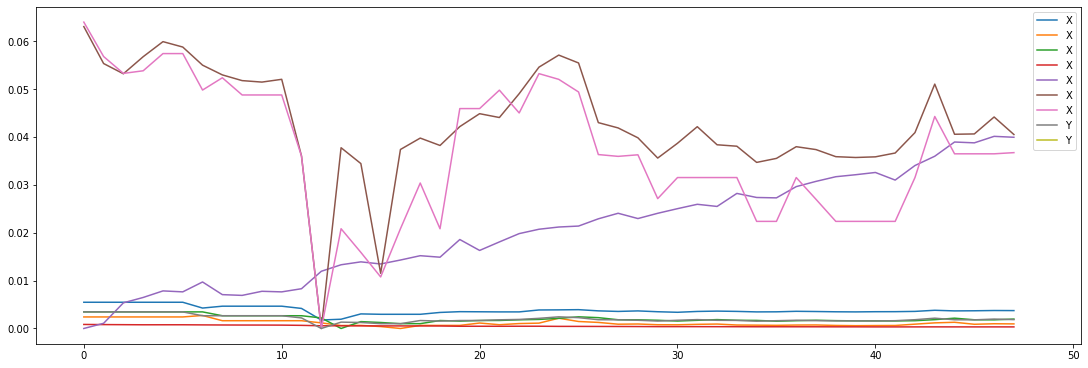

In [ ]:
# plotting the serie
fig, ax = plt.subplots(constrained_layout=True, figsize=(15,5))

ax.plot(np.linspace(0,sequence_lenght-1,sequence_lenght),x_train[0][0,:,0:20],label="X")
ax.plot(np.linspace(0,sequence_lenght-1,sequence_lenght),x_train[1][0,:,:],label="Y")
ax.plot(np.linspace(sequence_lenght,sequence_lenght+output_lenght-1,output_lenght),y_train[0,:,:],label="Y")

ax.legend(loc="upper right")
plt.show()

### Creating HRHN Model

In this version, we make multistep predictions like sequence-to-sequence models of the Bahadanau or Luong type :

The HRHN model is described in this research paper : [Hierarchical Attention-Based Recurrent Highway Networks for Time Series Prediction](https://arxiv.org/pdf/1806.00685)

**1. creating the encoder**

The encoder aims to create hidden representations of exogenous series that take into account the spatial relations between these series as well as the temporal relations.
The spatial relations are extracted using a set of convolution networks which produce representations w1, w2... w(T-1).
These representations are then encoded by a 3-layer RHN network in order to extract the temporal relationships. At the output of this RHN network, 3 tensors are extracted, each of which contains the (T-1) hidden states of each layer of the RHN network.

***a. Creation of parallelized CNNs***

the structure of a convolution network is composed of three CNN-1D + Max-pooling layers:

The integration of each network in Keras is parallelized:

In [ ]:
# __init__ method arguments
#   dim_filters_cnn   :   filter dimension list e.g: [3,3,3]
#   nbr_filters_cnn   :   number of filters on each layer list e.g: [16,32,64]
#   dim_max_pooling   :   max pooling dimension after each layer list e.g: [3,3,3]

class Encoder_CNN(tf.keras.layers.Layer):
  def __init__(self, dim_filters_cnn, nbr_filters_cnn, dim_max_pooling,dim_motif):
    self.dim_filters_cnn = dim_filters_cnn
    self.nbr_filters_cnn = nbr_filters_cnn
    self.dim_max_pooling = dim_max_pooling
    self.dim_motif = dim_motif
    super().__init__()                # calling Layer class __init__()
  
  # creating Tin Convolution networks + max_pooling in parallel
  ############################################################
  def build(self,input_shape):
    convs = []
    input_cnns = []

    # creating Tin CNN inputs
    for i in range(input_shape[1]):
        input_cnns.append(tf.keras.Input(shape=(input_shape[2],1)))       # input = Tin*(batch_size,#dim,1)

    # creating Tin CNNs
    for i in range(input_shape[1]):
      conv = tf.keras.layers.Conv1D(filters=self.nbr_filters_cnn[0],      # conv : (batch_size,#dim,16)
                                    kernel_size=self.dim_filters_cnn[0],
                                    activation='relu',
                                    padding='same',
                                    strides=1)(input_cnns[i])
      conv = tf.keras.layers.MaxPool1D(pool_size=self.dim_max_pooling[0],      # conv : (batch_size,#pooling1,16)
                                       padding='same')(conv)
      for n in range(1,len(self.dim_filters_cnn)):
        conv = tf.keras.layers.Conv1D(filters=self.nbr_filters_cnn[n],    # conv : (batch_size,#pooling_x,dim_filters_cnn[n])
                                      kernel_size=self.dim_filters_cnn[n],
                                      activation='relu',
                                      padding='same',
                                      strides=1)(conv)
        conv = tf.keras.layers.MaxPool1D(pool_size=self.dim_max_pooling[n],    # conv : (batch_size,#pooling_x,dim_filters_cnn[n])
                                         padding='same')(conv)
      convs.append(conv)
    
    # Creating the Tin CNNs concatenated output
    out = tf.convert_to_tensor(convs)                                     # out : (Tin,batch_size,#pooling,64)
    out = tf.transpose(out,perm=[1,0,2,3])                                # out : (batch_size,Tin,#pooling,64)
    out = tf.keras.layers.Reshape(                                        # out : (batch_size,Tin,#pooling*64)
        target_shape=(out.shape[1],out.shape[2]*out.shape[3]))(out)

    if self.dim_motif == 0:
      out = tf.keras.layers.Dense(units=out.shape[2])(out)                  # out : (batch_size,Tin,dim_motif = #pooling*64) 
    else:
      out = tf.keras.layers.Dense(units=self.dim_motif)(out)                # out : (batch_size,Tin,dim_motif) 

    # creating the global model
    self.conv_model = tf.keras.Model(inputs=input_cnns,outputs=out)

    super().build(input_shape)        # calling build() method
    
  # inputs :
  #     input:  exogeneous series input  : (batch_size,Tin,#dim)
  # outputs :
  #     w:      outputs from the CNNs and the dense layer : (batch_size,Tin,#dim_motif)
  #                                       (last filter size=64)
  def call(self, input):
    # Temporal cuts on exogenous series
    # format : Tin*(batch_size,#dim,1)
    input_list = []
    for i in range(input.shape[1]):
      input_list.append(tf.transpose(input[:,i:i+1,:],perm=[0,2,1]))      # (batch_size,#dim,1)
    # Spatial convolutions of exogenous series
    w = self.conv_model(input_list)                                       # (batch_size,Tin,dim_motif)
    return w

***b. creating RHN cells***

An RHN cell is created by using the previous code to which :  
- We add the possibility to return all the hidden states of each layer
- We add the consideration of the input dimension corresponding to the dimension of the output patterns of the CNN networks (dim_motif)

In [ ]:
class RHN_cell(tf.keras.layers.Layer):
  def __init__(self, dim_RHN, nbr_layers, return_all_states = False, dim_input=1):
    self.dim_RHN = dim_RHN
    self.nbr_layers = nbr_layers
    self.dim_input = dim_input
    self.return_all_states = return_all_states
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.Wh = self.add_weight(shape=(input_shape[2],self.dim_RHN),initializer="normal",name="Wh")       # (#dim, #RHN)
    self.Wt = self.add_weight(shape=(input_shape[2],self.dim_RHN),initializer="normal",name="Wt")       # (#dim, #RHN)
    self.Wc = self.add_weight(shape=(input_shape[2],self.dim_RHN),initializer="normal",name="Wc")       # (#dim, #RHN)

    self.Rh = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,self.dim_RHN),initializer="normal",name="Rh")      # (n_layers,#RHN, #RHN)
    self.Rt = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,self.dim_RHN),initializer="normal",name="Rt")      # (n_layers,#RHN, #RHN)
    self.Rc = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,self.dim_RHN),initializer="normal",name="Rc")      # (n_layers,#RHN, #RHN)

    self.bh = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,1),initializer="normal",name="bh")        # (n_layers,#RHN, 1)
    self.bt = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,1),initializer="normal",name="bt")        # (n_layers,#RHN, 1)
    self.bc = self.add_weight(shape=(self.nbr_layers,self.dim_RHN,1),initializer="normal",name="bc")        # (n_layers,#RHN, 1)

    super().build(input_shape)        # calling build() method

    # Initializing dropout masks
    
  def InitDropoutMasks(self,drop=0.0):
    self.Wh_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.dim_input,1)),dtype=tf.float32)                 # (#dim,1)
    self.Wt_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.dim_input,1)),dtype=tf.float32)                 # (#dim,1)
    self.Wc_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.dim_input,1)),dtype=tf.float32)                 # (#dim,1)
    self.Rh_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.nbr_layers,self.dim_RHN,1)),dtype=tf.float32)  # (n_layers,#RHN,1)
    self.Rt_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.nbr_layers,self.dim_RHN,1)),dtype=tf.float32)  # (n_layers,#RHN,1)
    self.Rc_ = tf.convert_to_tensor(np.random.binomial(n=1,p=1.0-drop,size=(self.nbr_layers,self.dim_RHN,1)),dtype=tf.float32)  # (n_layers,#RHN,1)

  # Inputs :
  #     input:          Inputs X[t]        : (batch_size,1,#dim)
  #     init_hidden:    Init. hidden state    : (batch_size,#RHN)
  # Output :
  #     sL:             Last layer hidden state       : (batch_size,#RHN) 
  #           or        hidden state of each layer SL[t]    : (batch_size,nbr_layers,#RHN)
  def call(self, input, init_hidden=None):
    # setting a null state vector if needed
    if init_hidden == None:
      init_hidden = tf.matmul(tf.zeros(shape=(self.dim_RHN,input.shape[2])), # (#RHN,#dim)X(batch_size,#dim,1) = (batch_size,#RHN,1)
                              tf.transpose(input,perm=[0,2,1]))
      init_hidden = tf.squeeze(init_hidden,-1)                               # (batch_size,#RHN,1) => (batch_size,#RHN)
  
    sl_list = []                                                            # List to save the hidden states of each layer
    # Calculation of hl, tl and cl
    for i in range(self.nbr_layers):
      if i==0:
        # Applying mask to weights
        Rh = tf.multiply(self.Rh_[0,:,:],self.Rh[0,:,:])                      # (#RHN,1)_x_(#RHN,#RHN) = (#RHN,#RHN)
        Rt = tf.multiply(self.Rt_[0,:,:],self.Rt[0,:,:])
        Rc = tf.multiply(self.Rc_[0,:,:],self.Rc[0,:,:])

        Wh = tf.multiply(self.Wh_,self.Wh)                                    # (#dim,1)_x_(#dim,#RHN) = (#dim,#RHN)
        Wt = tf.multiply(self.Wt_,self.Wt)
        Wc = tf.multiply(self.Wc_,self.Wc)
   
        # hl calculation
        hl = tf.matmul(Rh,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        hl = hl + self.bh[0,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        hl = hl + tf.matmul(tf.transpose(Wh),
                            tf.transpose(input,perm=[0,2,1]))               # (#RHN,#dim)X(batch_size,#dim,1) = (batch_size,#RHN,1)
        hl = tf.squeeze(hl,-1)                                              # (batch_size,#RHN)
        hl = K.tanh(hl)

        # tl calculation
        tl = tf.matmul(Rt,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        tl = tl + self.bt[0,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        tl = tl + tf.matmul(tf.transpose(Wt),
                            tf.transpose(input,perm=[0,2,1]))               # (#RHN,#dim)X(batch_size,#dim,1) = (batch_size,#RHN,1)
        tl = tf.squeeze(tl,-1)                                              # (batch_size,#RHN)
        tl = tf.keras.activations.sigmoid(tl)

        # cl calculation
        cl = tf.matmul(Rc,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        cl = cl + self.bc[0,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        cl = cl + tf.matmul(tf.transpose(Wc),
                            tf.transpose(input,perm=[0,2,1]))               # (#RHN,#dim)X(batch_size,#dim,1) = (batch_size,#RHN,1)
        cl = tf.squeeze(cl,-1)                                              # (batch_size,#RHN)
        cl = tf.keras.activations.sigmoid(cl)

      else:
        # applying mask to weights
        Rh = tf.multiply(self.Rh_[i,:,:],self.Rh[i,:,:])
        Rt = tf.multiply(self.Rt_[i,:,:],self.Rt[i,:,:])
        Rc = tf.multiply(self.Rc_[i,:,:],self.Rc[i,:,:])

        # hl calculation
        hl = tf.matmul(Rh,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        hl = hl + self.bh[i,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        hl = tf.squeeze(hl,-1)                                              # (batch_size,#RHN)
        hl = K.tanh(hl)

        # tl calculation
        tl = tf.matmul(Rt,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        tl = tl + self.bt[i,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        tl = tf.squeeze(tl,-1)                                              # (batch_size,#RHN)
        tl = tf.keras.activations.sigmoid(tl)

        # cl calculation
        cl = tf.matmul(Rc,tf.expand_dims(init_hidden,-1))                   # (#RHN,#RHN)X(batch_size,#RHN,1) = (batch_size,#RHN,1)
        cl = cl + self.bc[i,:,:]                                            # (batch_size,#RHN,1) + (#RHN,1) = (batch_size,#RHN,1)
        cl = tf.squeeze(cl,-1)                                              # (batch_size,#RHN)
        cl = tf.keras.activations.sigmoid(cl)
      
      # sl calculation
      sl = tf.keras.layers.multiply([hl,tl])                                # (batch_size,#RHN)
      sl = sl + tf.keras.layers.multiply([init_hidden,cl])                  # (batch_size,#RHN)
      sl_list.append(sl)       # Saving the hidden state of the current layer
      init_hidden = sl
    if self.return_all_states == False:
      return sl
    else:
      sl_list = tf.convert_to_tensor(sl_list)                             # (nbr_layers,batch_size,#RHN)
      sl_list = tf.transpose(sl_list,perm=[1,0,2])                        # (batch_size,nbr_layers,#RHN)
      return sl_list


***c. Creation of the encoder: Convolutions + RHN***

In [ ]:
#  __init__ method arguments
#   dim_filters_cnn   :   filters dimension list e.g: [3,3,3]
#   nbr_filters_cnn   :   number of filters on each layer list e.g: [16,32,64]
#   dim_max_pooling   :   each layer max pooling dimension list e.g: [3,3,3]
#   dim_motif         :   dimension of the output from the CNN
#   dim_RHN           :   dimension of the RHN hidden vector
#   nbr_RHN_layers   :   number of RHN layers
#   dropout           :   variational dropout for RHN ex: [0.1]

class Encoder(tf.keras.layers.Layer):
  def __init__(self, dim_filters_cnn, nbr_filters_cnn, dim_max_pooling, dim_motif,dim_RHN,nbr_RHN_layers, dropout=0.0):
    self.dim_filters_cnn = dim_filters_cnn
    self.nbr_filters_cnn = nbr_filters_cnn
    self.dim_max_pooling = dim_max_pooling
    self.dim_motif = dim_motif
    self.dim_RHN = dim_RHN
    self.nbr_RHN_layers = nbr_RHN_layers
    self.dropout = dropout
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.encoder_cnn = Encoder_CNN(dim_filters_cnn=self.dim_filters_cnn,nbr_filters_cnn=self.nbr_filters_cnn,dim_max_pooling=self.dim_max_pooling,dim_motif=self.dim_motif)
    self.RHN = RHN_cell(dim_RHN=self.dim_RHN,nbr_layers=self.nbr_RHN_layers,return_all_states=True,dim_input=self.dim_motif)
    super().build(input_shape)        # calling build() method
    
  # Inputs :
  #     input:          inputs X         : (batch_size,Tin,#dim)
  # Outputs :
  #     hidden_states   Hidden states   : (batch_size,nbr_couches,Tin,#RHN)
  def call(self, input):
    # Spatial convolutions of exogenous series
    w = self.encoder_cnn(input)      #  (batch_size,Tin,dim_motif)

    # Encoding CNN outputs with RHN cells
    sequence = []
    hidden = None

    # Initializing dropout masks for all time steps
    self.RHN.InitDropoutMasks(self.dropout)

    # Applying RHN cell for all time steps
    for i in range(input.shape[1]):
      hidden = self.RHN(w[:,i:i+1,:],hidden)          # sends (batch_size,1,dim_motif)
      sequence.append(hidden)                         # saves (batch_size,nbr_layers,#RHN)

      # The first hidden state of the next moment
      # is the hidden state of the last previous layer
      hidden = hidden[:,self.nbr_RHN_layers-1,:]       # (batch_size,#RHN)

    # Process encoder hidden vector format
    sequence = tf.convert_to_tensor(sequence)               # (Tin,batch_size,nbr_layers,#RHN)
    hidden_states = tf.transpose(sequence,perm=[1,2,0,3])   # (batch_size,nbr_layers,Tin,#RHN)  

    return hidden_states

**2. Creating the decoder**

The decoder takes as input and at each time step:
- The output tensor of the RHN encoder which contains all the hidden vectors of the different layers: (batch_size,Nbr_layers,Tin,#RHN)
- The hidden state of the last layer of the previous RHN decoder: (batch_size,#RHN)
- The value of the target series at the current time: (batch_size,1,1)



**a. Creating hierarchical attention layer**



We start by creating the function that calculates the scores. This function will be called with the TimeDistributed method of Keras

In [ ]:
class ScoreCalc(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.T = self.add_weight(shape=(input_shape[1],input_shape[1]),initializer="normal",name="T")            # (#RHN, #RHN)
    self.U = self.add_weight(shape=(input_shape[1],input_shape[1]),initializer="normal",name="U")            # (#RHN, #RHN)
    self.b = self.add_weight(shape=(input_shape[1],1),initializer="normal",name="b")                         # (#RHN, 1)
    self.v = self.add_weight(shape=(input_shape[1],1),initializer="normal",name="v")                         # (#RHN, 1)
    super().build(input_shape)        # calling build() method

  #     hid_state:  RHN initial state          : (batch_size,#RHN)
  def SetInitState(self,hid_state):
    self.hid_state = hid_state

  def compute_output_shape(self,input_shape):
    return(input_shape[0],1)

  # Inputs :
  #     input:      1 RHN encoder output     : (batch_size,#RHN)
  # Outputs :
  #     score:      score                     : (batch_size,1,1)
  def call(self, input):
    score = tf.matmul(self.U,tf.expand_dims(input,-1))                      # (#RHN,#RHN)x(batch_size,#RHN,1) = (batch_size,#RHN,1)
    score = score + tf.matmul(self.T,tf.expand_dims(self.hid_state,-1))     # (batch_size,#RHN,1)
    score = score + self.b                                                  # (batch_size,#RHN,1)
    score = K.tanh(score)
    score = tf.matmul(tf.transpose(self.v),score)                           # (1,#RHN)x(batch_size,#RHN,1) = (batch_size,1,1)
    return tf.squeeze(score,-1)                                             # (batch_size,1)

We now create the hierarchical attention layer:

In [ ]:
class HierarchicalAttention(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.score_layer = ScoreCalc()
    super().build(input_shape)        # calling build() method
    
  # Inputs :
  #     input:      RHN encoder layer output       : (batch_size,Tin,#RHN)
  #     hid_state:  RHN initial state                        : (batch_size,#RHN)
  # Ouptuts :
  #     vc:         context sub vector                    : (batch_size,1,RHN)
  def call(self, input, hid_state):
    # Calculating the scores
    self.score_layer.SetInitState(hid_state)
    scores = tf.keras.layers.TimeDistributed(self.score_layer)(input)        # (batch_size,Tin,#RHN) : Timestep = Tin
                                                                              # (batch_size,#RHN) sent Tin times
                                                                              # (batch_size,Tin,1) returned
    scores = tf.keras.activations.softmax(scores,axis=1)                      # (batch_size,Tin,1)

    # Applying scores to RHN layer outputs
    weights = tf.multiply(input,scores)             # (batch_size,Tin,#RHN)_x_(batch_size,Tin,1) = (batch_size,Tin,#RHN)

    # Calculating context sub vector
    vc = K.sum(weights,axis=1)                      # (batch_size,#RHN)
    return tf.expand_dims(vc,1)                   # (batch_size,1,#RHN)

**b. creating the decoder**

In the decoder, we parallelize as many layers of attention as necessary in order to create a multi-input attention model.

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self,dim_RHN,nbr_RHN_layers,dropout=0.0):
    self.dim_RHN = dim_RHN
    self.nbr_RHN_layers = nbr_RHN_layers
    self.dropout = dropout
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    attentions = []
    inputs_attention = []

    # Creating "nbr_layers# attentions inputs
    # Each input is a list : [input,init_state] = [((batch_size,Tin,#RHN)),((batch_size,#RHN))]
    for i in range(input_shape[1]):
      inputs_attention.append([tf.keras.Input(shape=(input_shape[2],input_shape[3])),          # input = "nbr_layers"*(batch_size,Tin,#RHN)
                                 tf.keras.Input(shape=(input_shape[3]))])                      # init_state = "nbr_layers"*(batch_size,#RHN)

    # Creating "nbr_layers" hierarchical attentions inputs
    for i in range(input_shape[1]):
      att = HierarchicalAttention()(inputs_attention[i][0],                 # inputs_attention[i][0] : (batch_size,Tin,#RHN)
                                    inputs_attention[i][1])                 # inputs_attention[i][1] : (batch_size,#RHN)
      attentions.append(att)

    # Creating concatenated output of the "nbr_layers" layers of attentions
    out = tf.convert_to_tensor(attentions)                                # out : (nbr_layers,batch_size,1,#RHN)
    out = tf.transpose(out,perm=[1,0,2,3])                                # out : (batch_size,nbr_layers,1,#RHN)

    # Creating global model
    self.att_model = tf.keras.Model(inputs=inputs_attention,outputs=out)

    # Creating the weights
    self.Wtilda = tf.keras.layers.Dense(units=1,activation=None,use_bias=None)
    self.Vtilda = tf.keras.layers.Dense(units=1,activation=None,use_bias=True)

    # Creating RHN decoder
    self.dec_RHN = RHN_cell(dim_RHN=self.dim_RHN,nbr_layers=self.nbr_RHN_layers,return_all_states=False,dim_input=1)
   
    super().build(input_shape)        # calling build() method
    
  # Input :
  #     input:      Ouputs from RHN encoder   : (batch_size,nbr_layers,Tin,#RHN)
  #     hid_state:  RHN initial state                        : (batch_size,#RHN)
  #     Y:          target serie value                : (batch_size,1)
  #     only_att    if =True calculates only the ctx vector   : True/False
  # Outputs :
  #     d:          context vector                        : (batch_size,nbr_layers*RHN)
  #     s:          hidden vector from RHN decoder              : (batch_size,#RHN)
  def call(self, input, hid_state, Y, only_att):
    # Initialization of hidden state to 0 if needed
    # builds the zero tensor in the following size (batch_size,#RHN)
    if hid_state == None:
      coef = tf.expand_dims(input[:,0,0,0],-1)                        # (batch_size,1)
      coef = tf.expand_dims(coef,-1)                                  # (batch_size,1,1)
      hid_state = tf.matmul(coef,tf.zeros(shape=(1,input.shape[3])))  # (batch_size,1,1)X(1,#RHN) = (batch_size,1,#RHN)
      hid_state = tf.squeeze(hid_state,axis=1)                        # (batch_size,#RHN)

    # Building model input
    # nbr_layers*[((batch_size,Tin,#RHN)),((batch_size,#RHN))]
    input_model = []
    for i in range(input.shape[1]):
      input_model.append([input[:,i,:,:],hid_state])    # [((batch_size,Tin,#RHN)),((batch_size,#RHN))]
    
    # Calculation of context sub-vectors
    # with the parallelized hierarchical attention model
    d = self.att_model(input_model)                     # d : (batch_size,nbr_layers,1,#RHN)

    # Concatenation of context subvectors
    d = tf.squeeze(d,axis=2)                            # (batch_size,nbr_layers,#RHN)
    d = tf.keras.layers.Flatten()(d)                    # (batch_size,nbr_layers*RHN)

    if only_att == False :
      # y_tilda calculus
      ytilda = self.Wtilda(Y)                             # (batch_size,1)
      ytilda = ytilda + self.Vtilda(d)                    # (batch_size,1)

      # Initialization of dropout masks for all time steps
      self.dec_RHN.InitDropoutMasks(self.dropout)

      # Decoding with the RHN network
      s = self.dec_RHN(tf.expand_dims(ytilda,-1),hid_state)                  # (batch_size,#RHN)
      return d,s
    else:
      return d

# Creating HRHN Multistep + VAR + PID model

**1. Creating VAR layer**

We set up the following equation:

${\phi _{T + t}} = \sum\limits_{i = 1}^T {{A_i} \cdot {x_i}}  + \sum\limits_{i = 1}^{t - 1} {{A_{T + i}} \cdot {{\hat Y}_{T + i}} + \xi }$

In [ ]:
class VAR(tf.keras.layers.Layer):
  def __init__(self,output_lenght):
    self.output_lenght = output_lenght
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.Avar = self.add_weight(shape=(input_shape[1],input_shape[2]+1,input_shape[2]+1),initializer="normal",name="Avar")          # (Tin,#dim+1,#dim+1)
    self.Apred = self.add_weight(shape=(self.output_lenght,1),initializer="normal",name="Apred")                                # (output_lenght,1)
    self.zeta = self.add_weight(shape=(1,1),initializer="normal",name="zeta")                                                       # (1,1)
    super().build(input_shape)        # calling build() method
  
  # Outputs
  #     series_X  : exogeneous series X             : (batch_size,Tin,#dim)
  #     target_Y   : target                         : (batch_size,Tin,1)
  #     y_pred_1  : global predictions at (t-1)  : (batch_size,t,1)
  # Outputs
  #     phi       : VAR prediction              : (batch_size,1)
  def call(self,series_X,target_Y,y_pred_1):
    # Concatenating exogeneous series and target
    input = tf.keras.layers.concatenate([series_X,target_Y],axis=2)                 # (batch_size,Tin,#dim+1)
    input = tf.transpose(input,perm=[0,2,1])                                      # (batch_size,#dim+1,Tin)

    # VAR Algorithm
    output = []
    for i in range(series_X.shape[1]):
      output.append(tf.matmul(self.Avar[i,:,:],input[:,:,i:i+1]))                  # (#dim+1,#dim+1)x(batch_size,#dim+1,1)=(batch_size,#dim+1,1)
    output = tf.convert_to_tensor(output)                                           # (Tin,batch_size,#dim+1,1)
    output = tf.transpose(output,perm=[1,0,2,3])                                    # (batch_size,Tin,#dim+1,1)
    output = K.sum(output,axis=1)                                                   # (batch_size,#dim+1,1)

    # Retrieving target prediction
    output = tf.expand_dims(output[:,-1,:],-1)                                      # (batch_size,1,1)

    # Adding the linear combination of global predictions to previous instants
    for i in range(y_pred_1.shape[1]):
      output = output + tf.matmul(self.Apred[i:i+1,:],y_pred_1[:,i:i+1,:])  # (batch_size,1,1) + (1,1)x(batch_size,1,1) = (batch_size,1,1)

    output = tf.squeeze(output,-1) + self.zeta                                      # (batch_size,1)
    return output

**2. Adding PID corrector**

In [ ]:
class Corrector_PID(tf.keras.layers.Layer):
  def __init__(self,batch_size,layer):
    super().__init__()                # calling Layer class __init__()
    self.error_1 = tf.Variable(shape=(batch_size,1),trainable=False,initial_value=tf.zeros(shape=(batch_size,1)),name="error_1")               # (BS,1) = 0
    self.num_iteration = tf.Variable(shape=(batch_size,1),trainable=False,initial_value=tf.ones(shape=(batch_size,1)),name="iteration")          # (BS,1) = 1
    self.layer = layer
  
  def build(self,input_shape):
    self.Dense_Layer_P = tf.keras.layers.Dense(units=1,use_bias=False,kernel_initializer=tf.keras.initializers.Ones(),trainable=True,name="LayerP")
    self.Dense_Layer_I = tf.keras.layers.Dense(units=1,use_bias=False,kernel_initializer=tf.keras.initializers.Zeros(),trainable=True,name="LayerI")
    self.Dense_Layer_D = tf.keras.layers.Dense(units=1,use_bias=False,kernel_initializer=tf.keras.initializers.Zeros(),trainable=True,name="LayerD")
    self.Dense_Layer_II = tf.keras.layers.Dense(units=1,use_bias=False,kernel_initializer=tf.keras.initializers.Ones(),trainable=True,activation=self.layer,name="LayerFNNII")
    super().build(input_shape)        # calling build() method
  

  # Inputs
  #     y_tilda_1 :   initial prediction at (t-1) :   (batch_size,1)
  #     y_pred_1  :   global prediction at (t-1)  :   (batch_size,t,1)
  # Outputs
  #     PID(error) : Error handled by PID      :   (batch_size,1)
  def call(self, y_tilda_1,y_pred_1):
    # Calculation of the current error
    error = y_pred_1[:,-1,:] -y_tilda_1                                          # (batch_size,1)

    # Calculation of the proportional part
    P = self.Dense_Layer_P(error)                                               # (batch_size,1)

    # Calculation of the integral part
    I = (1/self.num_iteration)*self.Dense_Layer_I(self.error_1+error)          # (batch_size,1)

    # Calculation of the derivative part
    D = self.Dense_Layer_D(error-self.error_1)                                 # (batch_size,1)
    
    # Saving errors and #iterations
    self.num_iteration.assign(self.num_iteration+1)                               # (batch_size,1)
    self.error_1.assign(error + self.error_1)                                  # (batch_size,1)

    return self.Dense_Layer_II(tf.keras.layers.Concatenate(axis=1)([P,I,D]))        # (batch_size,1)

**3. Creating HRHN+VAR+PID layer**

In [ ]:
class Net_HRHN_VARPID(tf.keras.layers.Layer):
  def __init__(self,encoder,decoder,pred_VAR, corrector_PID, sequence_lenght, output_lenght, dim_RHN, nbr_output_layers, regul=0.0, drop = 0.0):
    self.encoder = encoder
    self.decoder = decoder
    self.pred_VAR = pred_VAR
    self.corrector_PID = corrector_PID
    self.sequence_lenght = sequence_lenght
    self.output_lenght = output_lenght
    self.regul = regul
    self.drop = drop
    self.dim_RHN = dim_RHN
    self.nbr_output_layers = nbr_output_layers
    super().__init__()                # calling Layer class __init__()
  
  def build(self,input_shape):
    self.W = self.add_weight(shape=(self.output_lenght,self.dim_RHN,1),initializer="normal",name="W")                                 # (output_lenght,#RHN, 1)
    self.V = self.add_weight(shape=(self.output_lenght,self.nbr_output_layers*self.dim_RHN,1),initializer="normal",name="V")         # (longueur_sortie,nbr_output_layers*#RHN, 1)
    self.b = self.add_weight(shape=(self.output_lenght,1,1),initializer="normal",name="b")                                            # (output_lenght,1, 1)
    self.Dense_LayerI = tf.keras.layers.Dense(units=1,use_bias=True,name="LayerFNNI")
    super().build(input_shape)        # calling build() method

  # Inputs :
  #     input:          inputs X           : (batch_size,Tin,#dim)
  #     output_seq:     output sequence Y   : (batch_size,Tin,1)
  # Outputs :
  #     output:         Prediction Y        : (batch_size,1,1)
  def call(self,input,output_seq):
    # calling the encoder
    # Retrieves all of the hidden states of the RHN encoder
    H = self.encoder(input)                # (batch_size,nbr_layers,Tin,#RHN)

    # Decoding of (T-1) target values
    hidden_state = None
    for t in range(input.shape[1]-1):
      vc, hidden_state = self.decoder(H,hidden_state,output_seq[:,t:t+1,0],only_att = False)
    
    # Predictions
    outputs = []
    y_pred_1 = tf.matmul(input[:,0:1,0:1],tf.zeros(shape=(1,1)))             # (batch_size,1,1)x(1,1) = (batch_size,1,1)
    y_pred_initial_1 = tf.matmul(input[:,0:1,0:1],tf.zeros(shape=(1,1)))     # (batch_size,1,1)x(1,1) = (batch_size,1,1)
    y_pred_initial_1 = tf.squeeze(y_pred_initial_1,-1)            # (batch_size,1)

    for i in range(0,self.output_lenght):
      # HRHN prediction
      vc = self.decoder(H,hidden_state,output_seq[:,0,0],only_att=True)
      y_hrhn = tf.matmul(tf.transpose(self.W[i,:,:]),tf.expand_dims(hidden_state,-1))   # (1,#RHN)*(batch_size,#RHN,1) = (batch_size,1,1)
      y_hrhn = y_hrhn +  tf.matmul(tf.transpose(self.V[i,:,:]),tf.expand_dims(vc,-1))        # (1,3*#RHN)*(batch_size,3*#RHN,1) = (batch_size,1,1)
      y_hrhn = y_hrhn + self.b[i,:,:]                                                        # (batch_size,1,1)
      y_hrhn = tf.squeeze(y_hrhn,-1)                                                         # (batch_size,1)

      # VAR prediction
      y_var = self.pred_VAR(input,output_seq,y_pred_1)                                       # (batch_size,1)

      # Initial prediction
      pred_initial = self.Dense_LayerI(tf.keras.layers.Concatenate(axis=1)([y_hrhn,y_var]))        # (batch_size,1)

      # Calculation of the error with the PID from the initial and global predictions at (t-1)
      error = self.corrector_PID(y_pred_initial_1,y_pred_1)                               # (batch_size,1)

      # Applies the error to the initial prediction
      y_pred = pred_initial + error                                                        # (batchs_size,1)

      # Saving the prediction
      outputs.append(y_pred)

      # updating the predictions at (t-1)
      y_pred_initial_1 = pred_initial
      y_pred_1 = tf.concat([y_pred_1,tf.expand_dims(y_pred,-1)],axis=1)                     # (batch_size,t,1)

      # Calculating the context vector and the hidden state for the next iteration
      vc, hidden_state = self.decoder(H,hidden_state,y_pred,only_att = False)
    outputs = tf.convert_to_tensor(outputs)               # (output_lenght,batch_size,1)
    outputs = tf.transpose(outputs,perm=[1,0,2])          # (batch_size,output_lenght,1)
    return outputs

#Creating the global model

In [ ]:
dim_RHN = 128
nbr_filters_cnn = [16,32,64]
dim_filters_cnn = [3,3,3]
dim_max_pooling = [3,3,3]
nbr_RHN_layers = 3
dim_motif = Encoder_CNN(dim_filters_cnn=dim_filters_cnn,nbr_filters_cnn=nbr_filters_cnn,dim_max_pooling=dim_max_pooling,dim_motif=0)(x_train[0][0:1,:,:]).shape[2]
drop=0.00

def get_model():
  sequences_inputs = tf.keras.layers.Input(shape=(sequence_lenght,x_train[0].shape[2]),batch_size=batch_size)
  sequence_outputs = tf.keras.layers.Input(shape=(sequence_lenght,1),batch_size=batch_size)

  encoder = Encoder(dim_filters_cnn=dim_filters_cnn,nbr_filters_cnn=nbr_filters_cnn,dim_max_pooling=dim_max_pooling,dim_motif=dim_motif,dim_RHN=dim_RHN,nbr_RHN_layers=nbr_RHN_layers,dropout=drop)
  decoder = Decoder(dim_RHN=dim_RHN,nbr_RHN_layers=nbr_RHN_layers,dropout=drop)
  pred_VAR = VAR(output_lenght=output_lenght)
  corrector = Corrector_PID(batch_size=batch_size,layer="linear")   # le batch size du correcteur est divise par 8 parce que lentrainement ici
                                                                              # est fait avec le TPU google qui a huit coeurs
                                                                              # si pas de strategie TPU alors on aura une erreur

  output = Net_HRHN_VARPID(encoder,decoder,pred_VAR, corrector, sequence_lenght=sequence_lenght,output_lenght=output_lenght,nbr_output_layers=nbr_RHN_layers,dim_RHN=dim_RHN,drop=drop)(sequences_inputs,sequence_outputs)

  model = tf.keras.Model([sequences_inputs,sequence_outputs],output)
  return model

# Training the model

In [ ]:
max_periods = 500

# instantiating the model
model = get_model()

# Defining parameters related to learning rate evolution
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate=0.005,
      decay_steps=50,
      decay_rate=0.01)

optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Using ModelCheckPoint method
CheckPoint = tf.keras.callbacks.ModelCheckpoint("train_weights.hdf5", monitor='loss', verbose=1, save_best_only=True, save_weights_only = True, mode='auto', save_freq='epoch')

# Compiling the model
model.compile(loss="mse", optimizer=optimizer)

# Training the model
#history = model.fit(x=dataset,validation_data=dataset_val, epochs=max_periods,verbose=1, callbacks=[CheckPoint,tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)])
history = model.fit(x=[x_train[0],x_train[1]],y=y_train,validation_data=([x_val[0],x_val[1]],y_val), epochs=max_periods,verbose=1, callbacks=[CheckPoint,tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)],batch_size=batch_size)

files.download('train_weights.hdf5')

Epoch 1/500
72/72 [==============================] - ETA: 0s - loss: 0.0232
Epoch 1: loss improved from inf to 0.02322, saving model to train_weights.hdf5
72/72 [==============================] - 954s 9s/step - loss: 0.0232 - val_loss: 0.0401
Epoch 2/500
72/72 [==============================] - ETA: 0s - loss: 0.0028
Epoch 2: loss improved from 0.02322 to 0.00277, saving model to train_weights.hdf5
72/72 [==============================] - 609s 8s/step - loss: 0.0028 - val_loss: 0.0268
Epoch 3/500
72/72 [==============================] - ETA: 0s - loss: 0.0014
Epoch 3: loss improved from 0.00277 to 0.00142, saving model to train_weights.hdf5
72/72 [==============================] - 592s 8s/step - loss: 0.0014 - val_loss: 0.0104
Epoch 4/500
72/72 [==============================] - ETA: 0s - loss: 0.0011
Epoch 4: loss improved from 0.00142 to 0.00105, saving model to train_weights.hdf5
72/72 [==============================] - 598s 8s/step - loss: 0.0011 - val_loss: 0.0045
Epoch 5/500
72/7

In [ ]:
model.load_weights("train_weights.hdf5")

In [ ]:
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

# plotting error according to the epoch
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(train_loss)),train_loss, label="train loss")
plt.plot(np.arange(0,len(validation_loss)),validation_loss, label ="validation loss")
plt.legend()

plt.title("error evolution according to epoch")

# predictions

In [ ]:
pred_ent = model.predict(dataset,verbose=1)
pred_val = model.predict(dataset_val,verbose=1)

29/29 [==============================] - 22s 766ms/step


In [ ]:
import plotly.graph_objects as go

shift = output_lenght

fig = go.Figure()

# plotting the original data
fig.add_trace(go.Scatter(x=df_final.index,y=tf.squeeze(norm_train_serie_X[:,-1:],-1),line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=df_final.index[splitting_time:],y=tf.squeeze(norm_test_serie_X[:,-1:],-1),line=dict(color='red', width=1)))

# predictions on the train set
pred = []
pred_index = []
step_time = []
step_val = []

max = int(len(pred_ent)/output_lenght)
#max = 10
for i in range(0,max):
  pred.append(tf.squeeze(pred_ent[i*output_lenght,0:shift,:],1))
  pred_index.append(df_final.index[sequence_lenght+i*output_lenght:sequence_lenght+(i+1)*output_lenght])
  step_val.append(pred_ent[i*output_lenght,0,0])
  step_time.append(df_final.index[sequence_lenght+i*output_lenght])

pred = tf.convert_to_tensor(pred).numpy()
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))

pred_index = np.asarray(pred_index)
pred_index = np.reshape(pred_index,(pred_index.shape[0]*pred_index.shape[1]))

fig.add_trace(go.Scatter(x=pred_index,y=pred, mode='lines', line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(x=step_time,y=step_val, mode='markers', line=dict(color='black', width=1)))

# predictions on the validation set
pred = []
pred_index = []
step_time = []
step_val = []
max = int(len(pred_val)/output_lenght)
#max = 10
for i in range(0,max):
  pred.append(tf.squeeze(pred_val[i*output_lenght,0:shift,:],1))
  pred_index.append(df_final.index[splitting_time+i*shift+sequence_lenght:splitting_time+i*shift+sequence_lenght+output_lenght])
  step_val.append(pred_val[i*output_lenght,0,0])
  step_time.append(df_final.index[splitting_time+i*shift+sequence_lenght])

pred = tf.convert_to_tensor(pred).numpy()
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
pred_index = np.asarray(pred_index)
pred_index = np.reshape(pred_index,(pred_index.shape[0]*pred_index.shape[1]))

fig.add_trace(go.Scatter(x=pred_index,y=pred, mode='lines', line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(x=step_time,y=step_val, mode='markers', line=dict(color='black', width=1)))

# plotting the predictions
fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

**Erreurs en multi step**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

shift = output_lenght

#train set predictions
pred = []

max = int(len(pred_ent)/output_lenght)
for i in range(0,max):
  pred.append(tf.squeeze(pred_ent[i*output_lenght,0:shift,:],1))

pred = tf.convert_to_tensor(pred).numpy()
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))

fig.add_trace(go.Scatter(x=df_final.index[sequence_lenght:],y=norm_train_serie_X[sequence_lenght:-(norm_train_serie_X[sequence_lenght:,:].shape[0]-pred.shape[0]),-1],line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=df_final.index[sequence_lenght:],y=pred,line=dict(color='green', width=1)))


fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

mse_ent = tf.keras.losses.mse(serie_entrainement_X_norm[sequence_lenght:-(serie_entrainement_X_norm[sequence_lenght:,:].shape[0]-pred.shape[0]),-1],pred)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

#validation set predictions
pred = []
max = int(len(pred_val)/output_lenght)
for i in range(0,max):
  pred.append(tf.squeeze(pred_val[i*output_lenght,0:shift,:],1))

pred = tf.convert_to_tensor(pred).numpy()
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))

fig.add_trace(go.Scatter(x=df_final.index[splitting_time+sequence_lenght::],y=norm_test_serie_X[sequence_lenght:-(norm_test_serie_X[sequence_lenght:,:].shape[0]-pred.shape[0]),-1],line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=df_final.index[splitting_time+sequence_lenght::],y=pred,line=dict(color='green', width=1)))


fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

mse_test = tf.keras.losses.mse(norm_test_serie_X[sequence_lenght:-(norm_test_serie_X[sequence_lenght:,:].shape[0]-pred.shape[0]),-1],pred)

In [ ]:
print(mse_ent)
print(mse_test)